In [1]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Step 1:  import library, data

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models
# dir(models)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
# ant and bee github
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git
# # medical mask github
# !git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590
Receiving objects: 100% (4590/4590), 186.72 MiB | 19.63 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


In [5]:
!ls ants_and_bees/train
!ls ./Face-Mask-Detection/dataset/

ls: cannot access 'ants_and_bees/train': No such file or directory
with_mask  without_mask


In [6]:
!ls ants_and_bees/val

ls: cannot access 'ants_and_bees/val': No such file or directory


In [7]:
!ls ./Face-Mask-Detection/dataset/with_mask

'0_0_≈˙◊¢ 2020-02-23 132115.png'		     225.jpg
'0_0_≈˙◊¢ 2020-02-23 132400.png'		     226.jpg
'0_0_≈˙◊¢ 2020-02-24 171804.png'		     227.jpg
'0_0_≈˙◊¢ 2020-02-24 172039.png'		     228.jpg
'0_0_≈˙◊¢ 2020-02-24 202509.png'		     229.jpg
'0_0_≈˙◊¢ 2020-02-24 205216.png'		     22.jpg
'0_0_≈˙◊¢ 2020-02-24 215234.png'		     230.jpg
'0_0_≈˙◊¢ 2020-02-24 215615.png'		     231.jpg
'0_0_≈˙◊¢ 2020-02-24 220536.png'		     232.jpg
'0_0_≈˙◊¢ 2020-02-24 222124.png'		     233.jpg
'0_0_≈˙◊¢ 2020-02-24 224833.png'		     2345.png
'0_0_≈˙◊¢ 2020-02-24 225329.png'		     234.jpg
'0_0_≈˙◊¢ 2020-02-24 225427.png'		     235.jpg
'0_0_≈˙◊¢ 2020-02-25 150422.png'		     236.jpg
'0_0_≈˙◊¢ 2020-02-25 150847.png'		     237.jpg
'0_0_≈˙◊¢ 2020-02-25 150921.png'		     238.jpg
'0_0_≈˙◊¢ 2020-02-25 185823.png'		     2398.png
'0_0_≈˙◊¢ 2020-02-25 190026.png'		     239.jpg
 0_0_0066ichXly3gbb630i4w6j30u00tzjtk.jpg	     240.jpg
 0_0_0066ntrkgw1f8lreziaalj30iw0cl40h.jpg	     241.jpg
 0_0_006ajtxFly1g5eb2v2jmcj30iy0npt9w.jpg	 

# Step 2 : Preprocessing

In [8]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])


transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.ImageFolder('./Face-Mask-Detection/dataset', transform=transform_train)
validation_dataset = datasets.ImageFolder('./Face-Mask-Detection/dataset', transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 20, shuffle=True)


In [9]:
print(len(training_dataset))
print(len(validation_dataset))

4094
4094


In [10]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [11]:

# !pip install Pillow


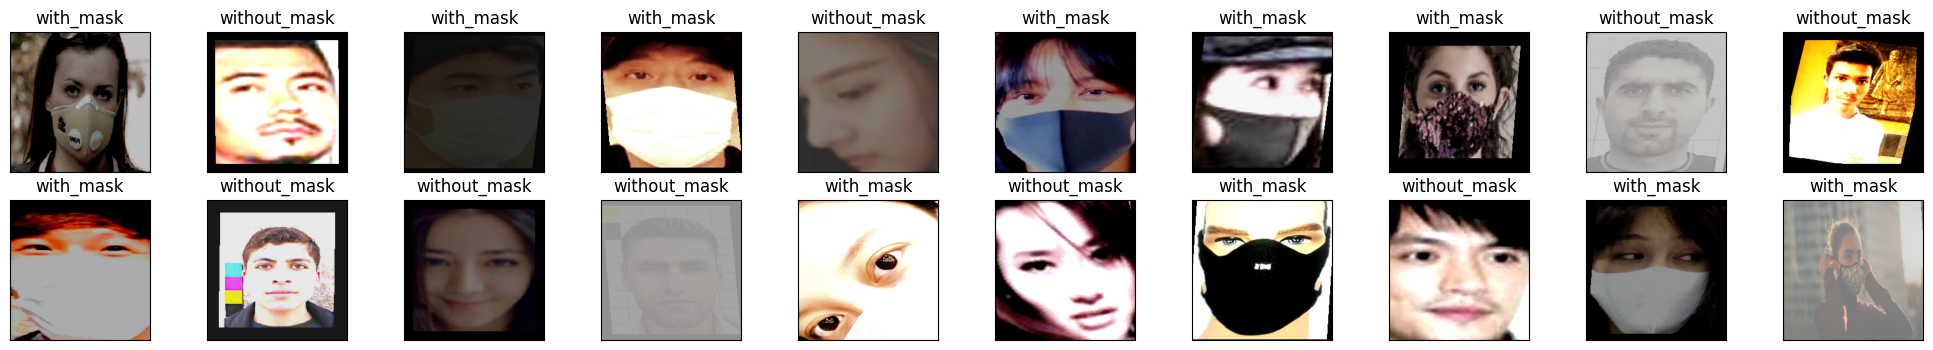

In [12]:
classes=('with_mask','without_mask')
dataiter = iter(training_loader)
images,labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [13]:
classes = ('with_mask', 'without_mask')

In [14]:
model = models.vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 269MB/s]


<img src="https://ithelp.ithome.com.tw/upload/images/20171206/20001976yeCo1PvEOs.jpg" width=500 />

In [15]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
for param in model.features.parameters():
  param.requires_grad = False



In [17]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)
print(model.classifier[6].out_features)
print(model)

2
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [19]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc.cpu())
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc.cpu())
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch : 1
training loss: 0.0119, acc 0.8881 
validation loss: 0.0021, validation acc 0.9858 
epoch : 2
training loss: 0.0085, acc 0.9199 
validation loss: 0.0009, validation acc 0.9944 
epoch : 3
training loss: 0.0074, acc 0.9311 
validation loss: 0.0011, validation acc 0.9941 
epoch : 4
training loss: 0.0077, acc 0.9292 
validation loss: 0.0005, validation acc 0.9971 
epoch : 5
training loss: 0.0067, acc 0.9336 
validation loss: 0.0003, validation acc 0.9980 


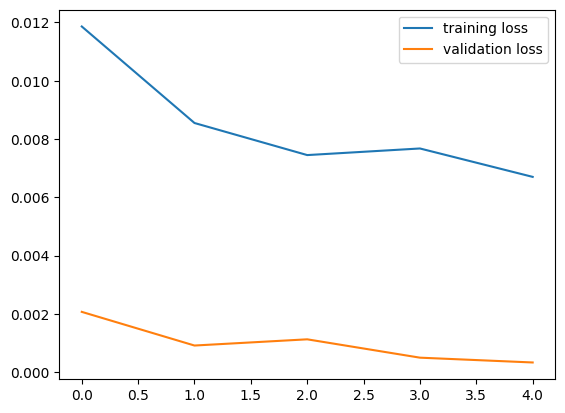

In [28]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

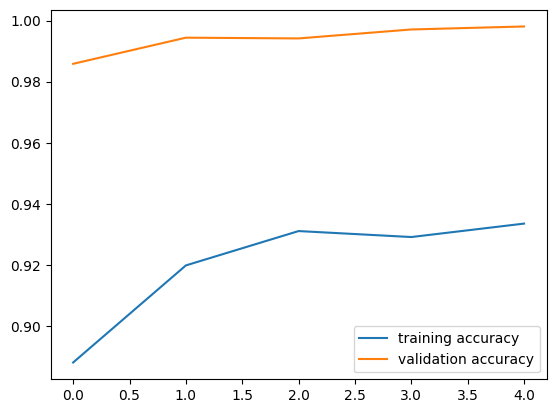

In [29]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [22]:
!pip3 install pillow==4.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 48.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-4.0.0-cp310-cp310-linux_x86_64.whl size=1083035 sha256=97441d37637e619503559759405bd3fbef6fa8fb8fe41fef5accf1c61c63df28
  Stored in directory: /root/.cache/pip/wheels/84/db/9f/05ee53ecb5fec707ce38b0b1dd115c4165fbf999bda7572063
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35417 sha256=9a2ceb26f09528bd44fd88f07bc63285663b0808b33a84dd4bdf1b6d2f25acae
  Stored in directory: /root/.cache/pip/wheels/02/39/c0/9eb1f7a42b4b38f6f333b6314d4ed11c46f12a0f7b78194f0d
Successfully built pillow olefile
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstall

In [23]:
import PIL.ImageOps

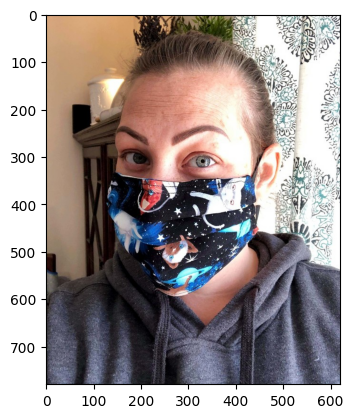

In [24]:
import requests
from PIL import Image

url = 'https://raw.githubusercontent.com/chandrikadeb7/Face-Mask-Detection/master/dataset/with_mask/0_0_0%20copy%2034.jpg'
url2 ='https://raw.githubusercontent.com/chandrikadeb7/Face-Mask-Detection/master/dataset/without_mask/0_0_anhu_0057.jpg'
url3='https://raw.githubusercontent.com/chandrikadeb7/Face-Mask-Detection/master/dataset/with_mask/0323.jpg'
response = requests.get(url3, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

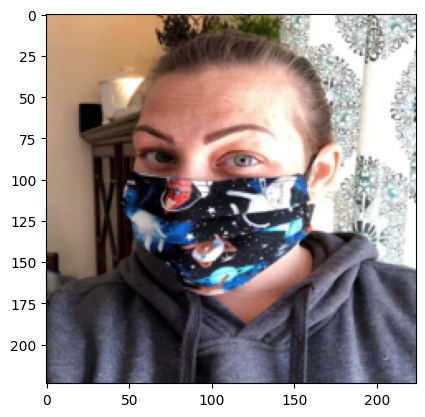

In [25]:
img = transform(img) 
plt.imshow(im_convert(img))

In [26]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

with_mask


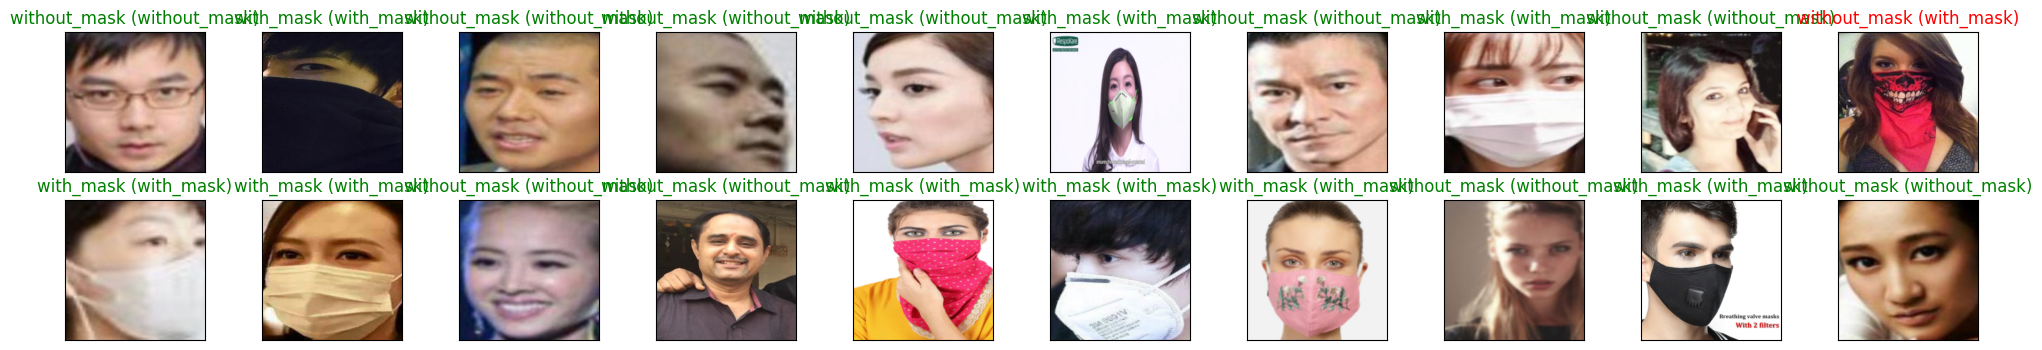

In [27]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))